# Building a phase diagram

In [1]:
%matplotlib inline
from pymatgen.matproj.rest import MPRester
mpr = MPRester('INSERT API KEY HERE')

In [2]:
from pymatgen.phasediagram.analyzer import PDAnalyzer
from pymatgen.phasediagram.maker import PhaseDiagram
from pymatgen.phasediagram.plotter import PDPlotter

In [3]:
system = ["Ni", "O"]
entries = mpr.get_entries_in_chemsys(system)

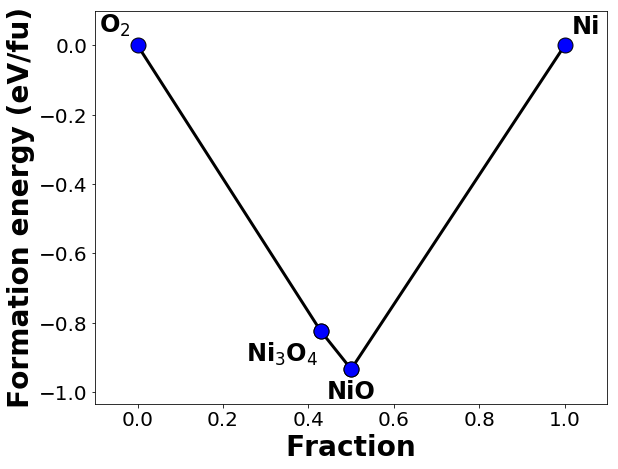

In [4]:
pd = PhaseDiagram(entries)
plotter = PDPlotter(pd)
plotter.show()

In [5]:
pda = PDAnalyzer(pd)
for e in pd.stable_entries:
    print(e)
    print("\n")

ComputedEntry O8
Energy = -39.4842
Correction = 0.0000
Parameters:
potcar_symbols = ['pbe O']
oxide_type = None
run_type = GGA
pseudo_potential = {'functional': 'pbe', 'labels': ['O'], 'pot_type': 'paw'}
hubbards = {}
is_hubbard = False
Data:
oxide_type = None


ComputedEntry Ni2 O2
Energy = -19.4297
Correction = -5.7326
Parameters:
potcar_symbols = ['pbe Ni_pv', 'pbe O']
oxide_type = oxide
run_type = GGA+U
pseudo_potential = {'functional': 'pbe', 'labels': ['Ni_pv', 'O'], 'pot_type': 'paw'}
hubbards = {'Ni': 6.2, 'O': 0.0}
is_hubbard = True
Data:
oxide_type = oxide


ComputedEntry Ni6 O8
Energy = -67.0796
Correction = -18.6023
Parameters:
potcar_symbols = ['pbe Ni_pv', 'pbe O']
oxide_type = oxide
run_type = GGA+U
pseudo_potential = {'functional': 'pbe', 'labels': ['Ni_pv', 'O'], 'pot_type': 'paw'}
hubbards = {'Ni': 6.2, 'O': 0.0}
is_hubbard = True
Data:
oxide_type = oxide


ComputedEntry Ni1
Energy = -5.7771
Correction = 0.0000
Parameters:
potcar_symbols = ['pbe Ni_pv']
oxide_type = N

# Add our own Entry into the phase diagram

In [6]:

from pymatgen.entries.computed_entries import ComputedEntry


c = ComputedEntry("Ni4O2",
                  -28,
                  parameters={"potcar_symbols": ['pbe Ni_pv', 'pbe O'],
                                            "hubbards":{'Ni': 6.2, 'O': 0.0}},
                  data={"oxide_type":"oxide"})
c

ComputedEntry Ni4 O2
Energy = -28.0000
Correction = 0.0000
Parameters:
potcar_symbols = ['pbe Ni_pv', 'pbe O']
hubbards = {'Ni': 6.2, 'O': 0.0}
Data:
oxide_type = oxide

In [7]:
from pymatgen.entries.compatibility import MaterialsProjectCompatibility
compat = MaterialsProjectCompatibility()
compat.process_entries([c])

[ComputedEntry Ni4 O2
 Energy = -28.0000
 Correction = -10.0606
 Parameters:
 potcar_symbols = ['pbe Ni_pv', 'pbe O']
 hubbards = {'Ni': 6.2, 'O': 0.0}
 Data:
 oxide_type = oxide]

# Exercise: Recreate the phase diagram with the new entry added in

In [ ]:
new_entries = list(entries)

new_entries.extend(_______)
pd = ________
plotter = ________
_____________

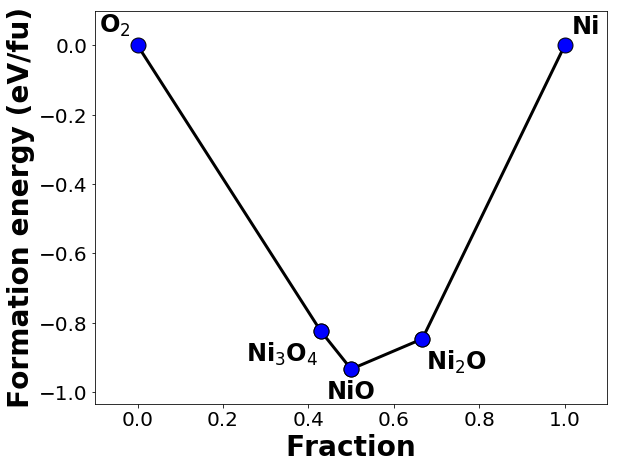

In [8]:
#Answer
new_entries = list(entries)

new_entries.extend(compat.process_entries([c]))
pd = PhaseDiagram(new_entries)
plotter = PDPlotter(pd)
plotter.show()